In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
  # for filename in filenames:
    # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading the "train" and "test" dataset.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# train_path = "/kaggle/input/System-Threat-Forecaster/train.csv"
# test_path = "/kaggle/input/System-Threat-Forecaster/test.csv"


# df_train = pd.read_csv(train_path)
# df_test = pd.read_csv(test_path)

df_train = pd.read_csv("D:/typa/esfiles/GoldenFace-main/myenv/STF/train.csv")
df_test = pd.read_csv("D:/typa/esfiles/GoldenFace-main/myenv/STF/test.csv")

# Basic Overview of the test and train data

Basic train dataframe from head and tail

In [3]:
df_train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [4]:
df_train.tail()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20,0
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10,0
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13,1
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08,0
99999,ad9c385b53f2ca788933a39603b84eda,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1003.0,0,7.0,0,7945.0,2.0,...,1,0.0,0,0,0.0,1.0,11.0,2018-07-14 15:36:00,2018-08-14,0


In [5]:
df_test.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


In [6]:
df_test.tail()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
9995,42d3ddb25eeb149517e2b6871b061df4,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1329.0,0,7.0,0,32554.0,3.0,...,20107.0,0,0.0,0,0,0.0,0.0,13.0,2018-09-16 18:15:00,2018-09-11
9996,3d474c494d797cafc2ab1665711f0f91,win8defender,1.1.15100.1,4.11.15063.0,1.273.894.0,0,7.0,0,53447.0,1.0,...,11386.0,0,0.0,0,0,0.0,1.0,1.0,2018-08-05 22:50:00,2017-04-05
9997,9aee2fc73af8240a688ceb83d41c0418,win8defender,1.1.15200.1,4.18.1807.18075,1.275.504.0,0,7.0,0,47238.0,2.0,...,12247.0,1,0.0,0,0,0.0,0.0,11.0,2018-08-31 16:03:00,2018-06-12
9998,a2f8c1f88b78271c38767fe43850b359,win8defender,1.1.15200.1,4.18.1807.18075,1.275.461.0,0,7.0,0,53447.0,1.0,...,4269.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-30 18:35:00,2017-12-12
9999,c1c85a860e30097b03c815aa908cd17d,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1068.0,0,7.0,0,41571.0,2.0,...,19970.0,0,0.0,0,0,0.0,0.0,12.0,2018-07-16 16:11:00,2018-07-10


In [7]:
# train_dataset datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [8]:
# test_dataset datatypes
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

In [9]:
# shape of df_train
df_train.shape

(100000, 76)

In [10]:
# shape of df_test
df_test.shape

(10000, 75)

In [11]:
# basic profiling of train_dataset
df_train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [12]:
# basic profiling of test_dataset
df_test.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,10000.0,9991.000000,10000.000000,9998.00000,9998.000000,9998.000000,10000.00000,10000.000000,9939.000000,9999.000000,...,9965.0,9968.000000,9971.000000,10000.000000,9993.000000,10000.000000,10000.000000,9988.000000,9938.000000,9938.000000
mean,0.0,6.848864,0.017400,48122.25075,1.327065,1.019004,0.99620,107.675900,80985.386055,168.507151,...,0.0,404.363864,33258.776853,0.505800,0.003202,0.131000,0.041200,0.056468,0.301067,7.906219
std,0.0,1.014203,0.130763,13611.92055,0.524149,0.157627,0.06153,63.268649,49085.060889,89.279554,...,0.0,220.361535,21239.190886,0.499991,0.056501,0.337417,0.198762,0.230834,0.458745,4.522045
min,0.0,0.000000,0.000000,645.00000,1.000000,0.000000,0.00000,1.000000,41.000000,1.000000,...,0.0,93.000000,737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,7.000000,0.000000,49480.00000,1.000000,1.000000,1.00000,50.000000,36164.000000,89.000000,...,0.0,142.000000,13182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.0,7.000000,0.000000,53447.00000,1.000000,1.000000,1.00000,97.000000,82373.000000,181.000000,...,0.0,500.000000,33075.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.0,7.000000,0.000000,53447.00000,2.000000,1.000000,1.00000,160.000000,122884.500000,258.000000,...,0.0,556.000000,52530.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,0.0,8.000000,1.000000,70330.00000,5.000000,4.000000,1.00000,222.000000,167953.000000,295.000000,...,0.0,1075.000000,72038.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


# Cleaning the data
Modifing the data for the visual and preprocessing steps before traing the model.

In [13]:
# Drop Duplicate rows

duplicate_rows_df_train = df_train[df_train.duplicated()]
duplicate_rows_df_test = df_test[df_test.duplicated()]

print("duplicate rows in train_dataset", duplicate_rows_df_train.shape)
print("duplicate rows in test_dataset", duplicate_rows_df_test)

duplicate rows in train_dataset (165, 76)
duplicate rows in test_dataset                              MachineID   ProductName EngineVersion  \
2161  f8552815f215d99bd5c0db06e09afb0a  win8defender   1.1.15000.2   
4098  e6ad4443f76b714e048afec17ccff326  win8defender   1.1.15200.1   

           AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
2161  4.18.1806.18062      1.271.876.0           0                      7.0   
4098  4.18.1807.18075     1.275.1176.0           0                      7.0   

      IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
2161                     0            53447.0                            1.0   
4098                     0            53447.0                            1.0   

      ...  FirmwareVersionID  IsSecureBootEnabled  IsVirtualDevice  \
2161  ...            63086.0                    1              0.0   
4098  ...             3542.0                    0              0.0   

      IsTouchEnabled  IsPe

In [14]:
# removing the duplicates

df_train = df_train.drop_duplicates()
df_train.count()

MachineID           99835
ProductName         99835
EngineVersion       99835
AppVersion          99835
SignatureVersion    99835
                    ...  
IsGamer             99276
RegionIdentifier    99276
DateAS              99835
DateOS              99811
target              99835
Length: 76, dtype: int64

**Drop Irrelevent columns**

In [15]:
# Droping MachineID (unique identifier, not useful for training)
train_data = df_train.drop(columns=["MachineID"], errors='ignore')
test_data = df_test.drop(columns=["MachineID"], errors='ignore')

# Handling the missing and null values


In [16]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
IsBetaUser            0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 75, dtype: int64
ProductName                          0
EngineVersion                        0
AppVersion                           0
SignatureVersion                     0
IsBetaUser                           0
                                    ..
IsAlwaysOnAlwaysConnectedCapable    12
IsGamer                             62
RegionIdentifier                    62
DateAS                               0
DateOS                               3
Length: 74, dtype: int64


**Seprate target variable from train_data**

In [17]:
y = train_data["target"]
X = train_data.drop(columns=["target"], errors='ignore')

In [18]:
# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Identifing Numberical columns
num_cols = X.select_dtypes(include=[np.number]).columns

**Handle missing values**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [21]:
# Apply the preprocessing pipeline to the numeric features
# filling with median for numeric
X[num_cols] = numeric_transformer.fit_transform(X[num_cols])
test_data[num_cols] = numeric_transformer.transform(test_data[num_cols])

# filling with mode for categorical
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])
test_data[cat_cols] = test_data[cat_cols].fillna(test_data[cat_cols].mode().iloc[0])

In [22]:
# Combine X and test_data for fitting the LabelEncoder
# Consistent Encoding
combined_data = pd.concat([X, test_data], axis=0)

**Labeling and categorizing features**

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Encode categorical variables
for col in cat_cols:
    le = LabelEncoder()
    le.fit(combined_data[col].astype(str))
    X[col] = le.transform(X[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))

In [25]:
# Feature Scaling
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

# Detecting Outliers

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

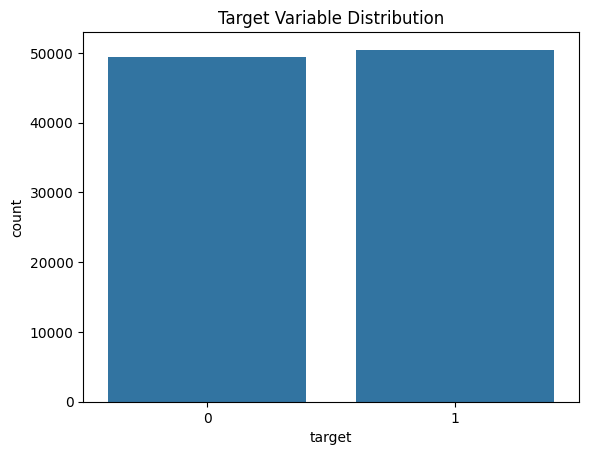

In [27]:
# EDA: Target distribution
sns.countplot(x=y)
plt.title("Target Variable Distribution")
plt.show()

As we can see the "0" and "1" in the datadsset is at proportion.

**BOX PLOT FOR ALL THE NUMERICAL FEATURES**

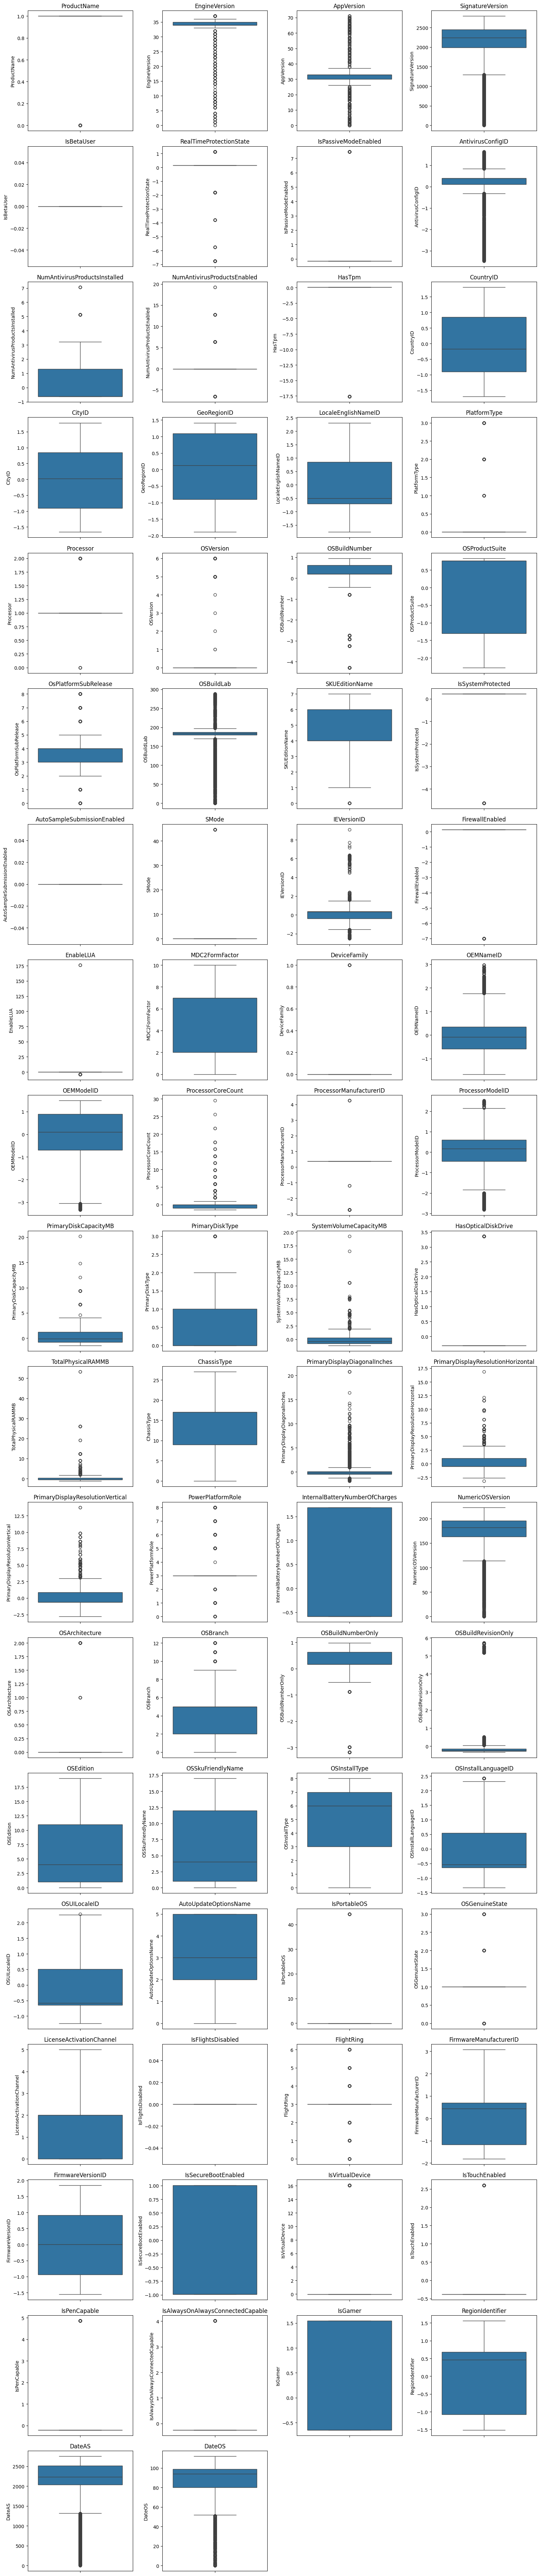

In [28]:
# Select numerical features
num_cols = X.select_dtypes(include=[np.number])

# Determine the number of features
num_features = len(num_cols.columns)

# Set number of rows and columns dynamically
rows = (num_features // 4) + 1  # Adjust rows based on feature count
cols = min(4, num_features)  # Max 4 columns per row

# Create figure
plt.figure(figsize=(cols * 4, rows * 4))

# Plot each feature in a subplot
for i, col in enumerate(num_cols.columns, 1):  # Start from 1 for subplot indexing
    plt.subplot(rows, cols, i)
    sns.boxplot(y=num_cols[col])
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
num_cols.shape

(99835, 74)

**Heat Map**
* How the features are related to each other

In [30]:
# Compute correlation matrix
corr_matrix = num_cols.corr()

corr_matrix

,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
ProductName,1.000000,0.003054,0.087586,0.003670,NaN,-0.004272,0.006425,0.071998,0.010339,-0.025424,...,0.003305,0.043765,-0.000403,0.014030,0.009866,0.011936,0.029646,-0.001917,-0.000937,0.131347
EngineVersion,0.003054,1.000000,0.169634,0.809536,NaN,-0.001024,0.009029,0.031904,-0.079430,-0.018163,...,-0.011921,-0.023126,0.000462,0.004567,0.013419,0.006110,0.065180,-0.016529,0.824153,0.161838
AppVersion,0.087586,0.169634,1.000000,0.147085,NaN,0.026513,-0.019304,0.083936,-0.090587,-0.053110,...,-0.000677,-0.052806,0.012662,0.019172,-0.004992,0.062914,0.050197,-0.006199,0.160559,-0.123461
SignatureVersion,0.003670,0.809536,0.147085,1.000000,NaN,-0.004222,0.014812,0.007064,-0.059925,-0.011276,...,-0.012575,-0.017294,0.000541,0.003997,0.016025,0.003474,0.071997,-0.015025,0.875947,0.201077
IsBetaUser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IsAlwaysOnAlwaysConnectedCapable,0.011936,0.006110,0.062914,0.003474,NaN,0.019871,-0.016479,0.060053,-0.074663,-0.018211,...,-0.057960,0.070532,-0.015469,0.457715,0.390791,1.000000,-0.041708,-0.007168,0.005485,-0.063173
IsGamer,0.029646,0.065180,0.050197,0.071997,NaN,-0.023049,0.025752,-0.027708,0.010418,-0.009272,...,-0.018085,-0.039229,-0.033108,-0.060912,-0.024652,-0.041708,1.000000,-0.048673,0.073873,0.159072
RegionIdentifier,-0.001917,-0.016529,-0.006199,-0.015025,NaN,-0.009105,0.007764,-0.007569,0.027588,0.000963,...,-0.033747,0.035854,0.005903,0.028165,0.005994,-0.007168,-0.048673,1.000000,-0.013657,-0.026715
DateAS,-0.000937,0.824153,0.160559,0.875947,NaN,-0.004387,0.016543,0.006248,-0.061007,-0.011749,...,-0.015106,-0.018081,-0.001057,0.006718,0.018281,0.005485,0.073873,-0.013657,1.000000,0.242520


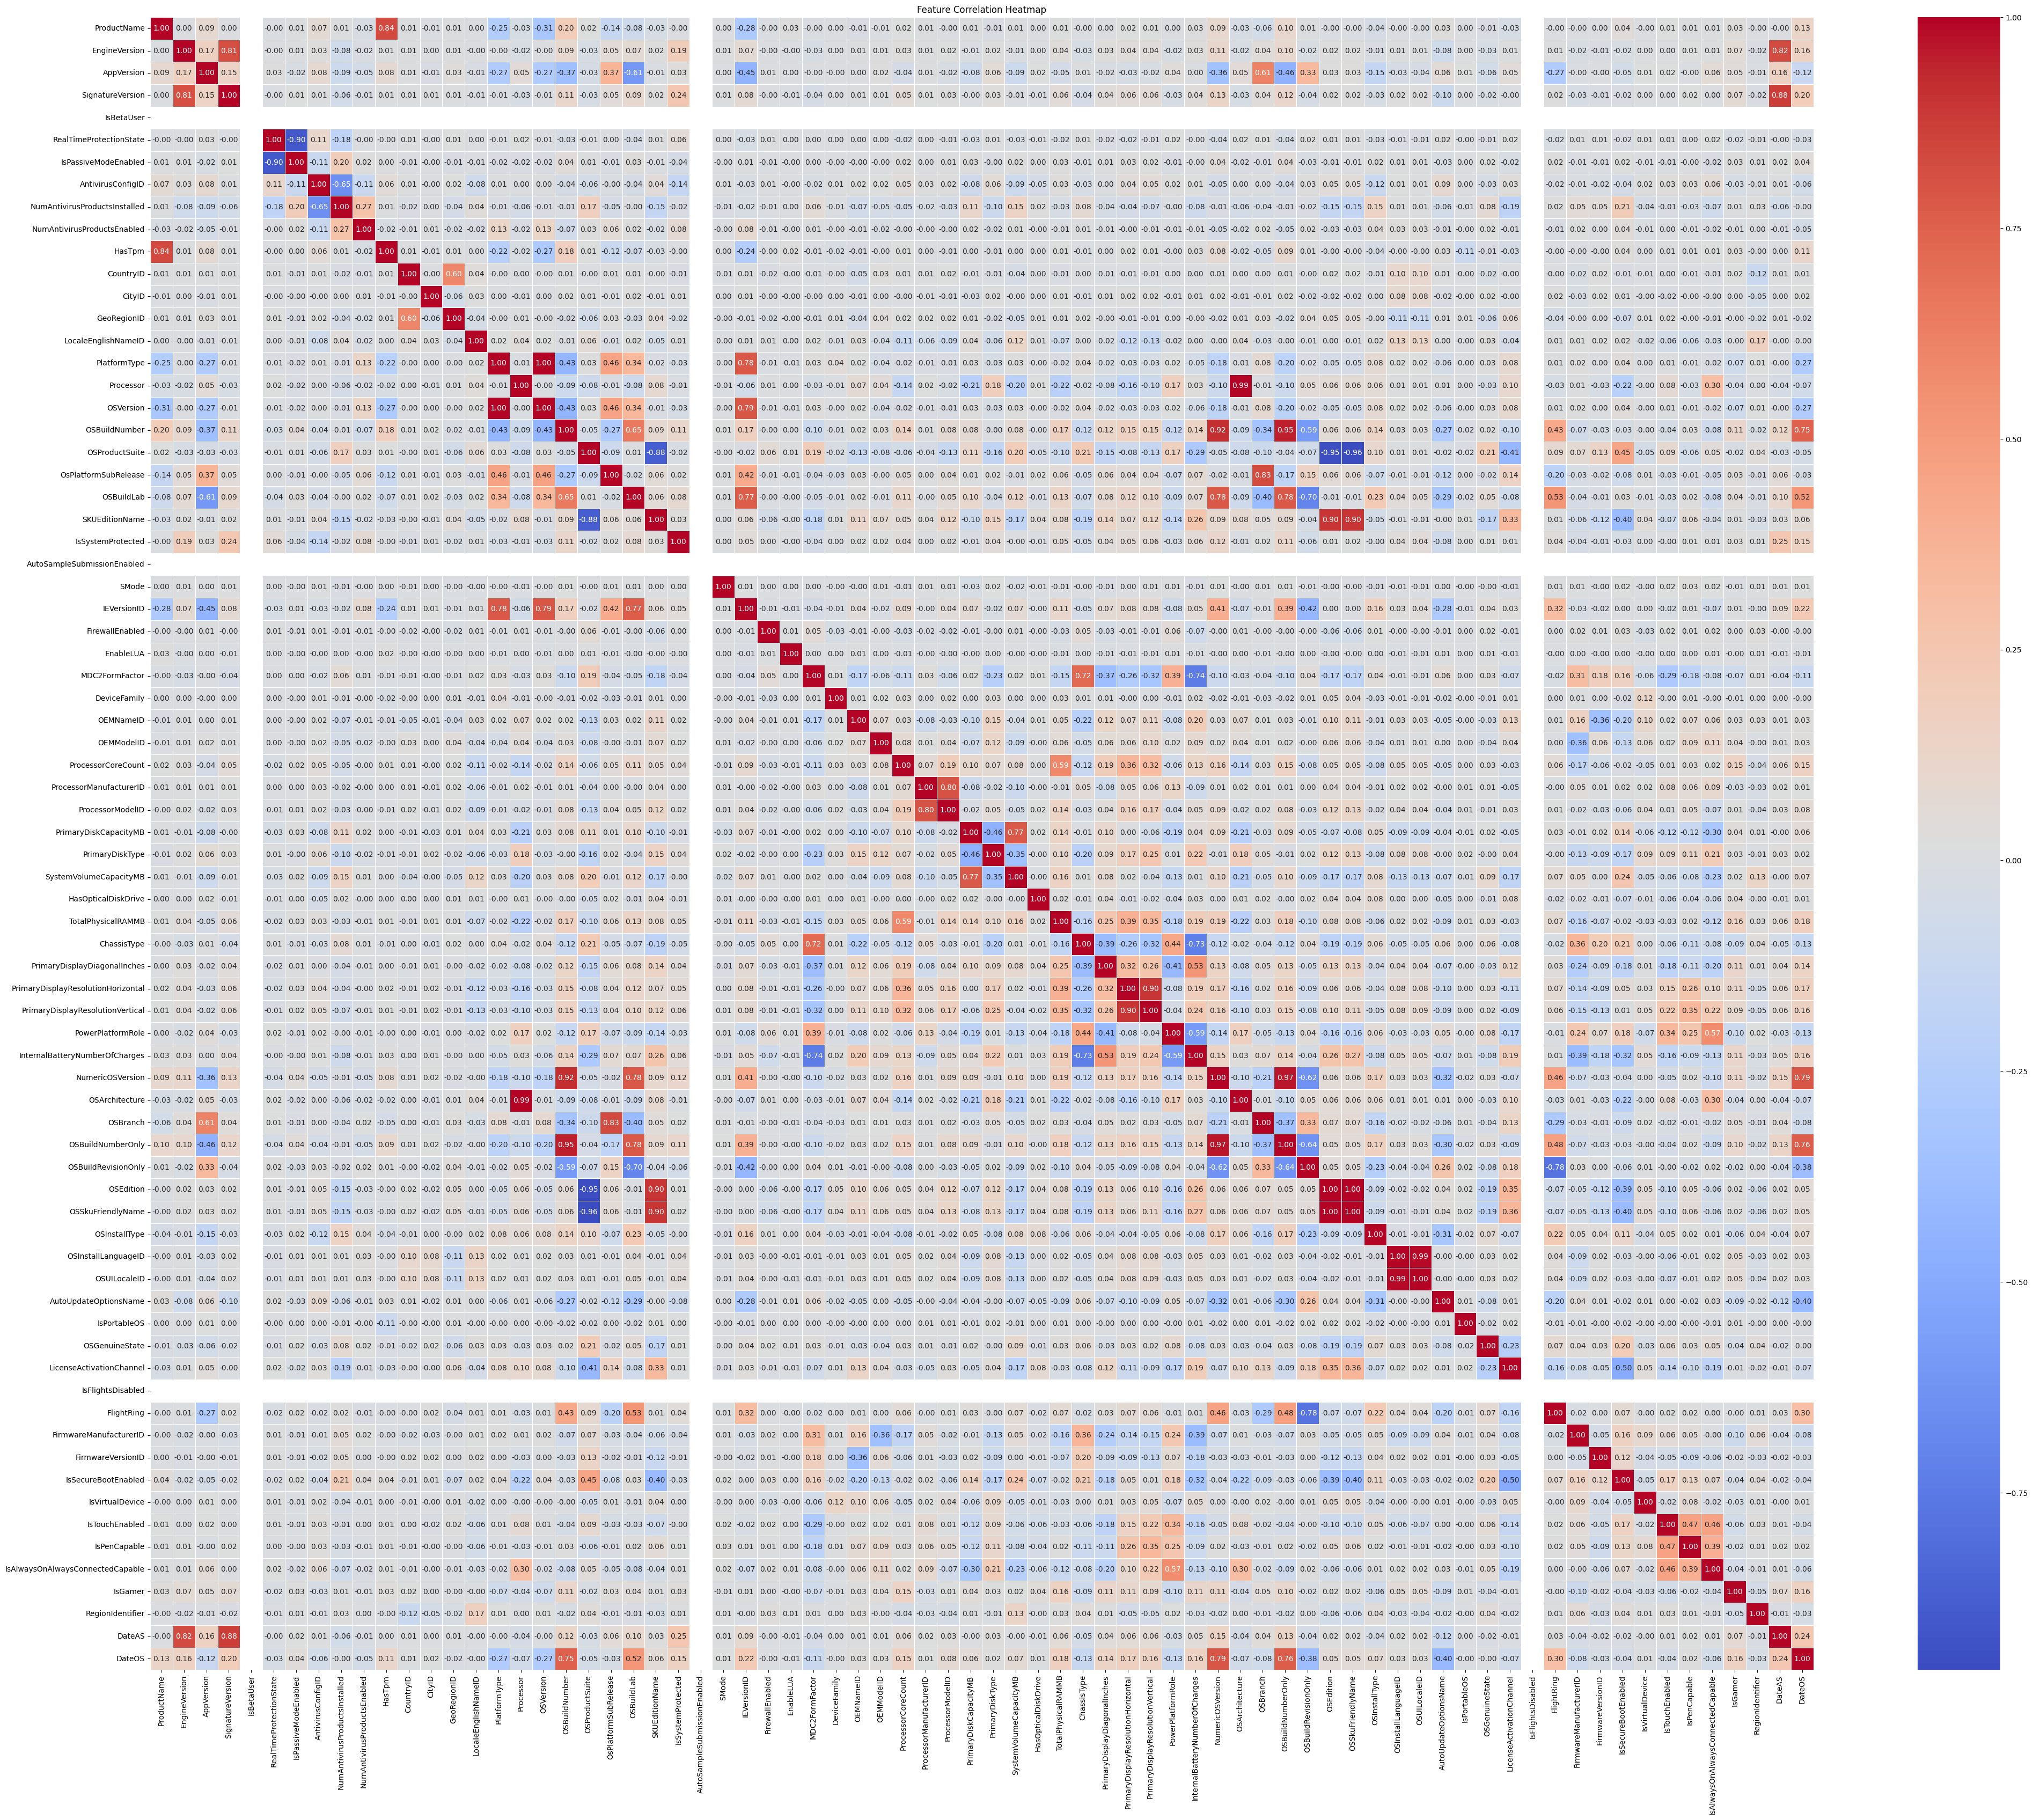

In [31]:
# Plot heatmap
plt.figure(figsize=(50, 40))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
# Convert matrix to long format
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]

# Remove self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs["Feature_1"] != corr_pairs["Feature_2"]]
corr_pairs["abs_corr"] = corr_pairs["Correlation"].abs()  # Use absolute values for sorting
corr_pairs = corr_pairs.sort_values(by="abs_corr", ascending=False).drop("abs_corr", axis=1)

# Keep only unique pairs
corr_pairs["sorted_pair"] = corr_pairs.apply(lambda x: tuple(sorted([x["Feature_1"], x["Feature_2"]])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset="sorted_pair").drop("sorted_pair", axis=1)

# Get top 40 feature correlations
top_40_corr = corr_pairs.head(40)
print(top_40_corr)

                             Feature_1                           Feature_2  \
3901                         OSEdition                   OSSkuFriendlyName   
1273                         OSVersion                        PlatformType   
3568                    OSArchitecture                           Processor   
4199                      OSUILocaleID                 OSInstallLanguageID   
3528                  NumericOSVersion                   OSBuildNumberOnly   
3941                 OSSkuFriendlyName                      OSProductSuite   
3867                         OSEdition                      OSProductSuite   
1382                     OSBuildNumber                   OSBuildNumberOnly   
1379                     OSBuildNumber                    NumericOSVersion   
376            RealTimeProtectionState                IsPassiveModeEnabled   
3944                 OSSkuFriendlyName                      SKUEditionName   
3299  PrimaryDisplayResolutionVertical  PrimaryDisplayResolution

In [33]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in-place
num_cols = num_cols[~((num_cols < lower_bound) | (num_cols > upper_bound)).any(axis=1)]

# Print the number of rows before and after removing outliers
print(f"New shape after outlier removal: {num_cols.shape}")

New shape after outlier removal: (16930, 74)


In [34]:
from imblearn.over_sampling import SMOTE

# Handling Imbalanced Data with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Preparing data for Model Training

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
import pickle
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [38]:
# Define base models - Handmade adjustments for different hyper parameters I did.
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss')
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, subsample=0.8, colsample_bytree=0.8, random_state=42)
rfc = RandomForestClassifier(n_estimators=300, max_depth=10, n_jobs=-1, random_state=42)
etc = ExtraTreesClassifier(n_estimators=300, max_depth=10, n_jobs=-1, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [41]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Epoch 1/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5226 - loss: 2.5195 - val_accuracy: 0.5668 - val_loss: 0.7867
Epoch 2/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5358 - loss: 1.1043 - val_accuracy: 0.5292 - val_loss: 0.9414
Epoch 3/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5391 - loss: 1.0263 - val_accuracy: 0.5324 - val_loss: 0.7546
Epoch 4/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5426 - loss: 0.9062 - val_accuracy: 0.5353 - val_loss: 0.7246
Epoch 5/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5463 - loss: 0.8254 - val_accuracy: 0.5102 - val_loss: 0.7843
Epoch 6/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.5446 - loss: 0.7929 - val_accuracy: 0.5582 - val_loss: 0.7183
Epoch 7/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5515 - loss: 0.7825 - val_accuracy: 0.5930 - val_loss: 0.6710
Epoch 8/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5481 - loss: 0.75

In [43]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5930 - loss: 0.6696 - val_accuracy: 0.5643 - val_loss: 0.6815
Epoch 2/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5836 - loss: 0.6730 - val_accuracy: 0.5755 - val_loss: 0.6790
Epoch 3/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5873 - loss: 0.6738 - val_accuracy: 0.5933 - val_loss: 0.6676
Epoch 4/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5939 - loss: 0.6700 - val_accuracy: 0.5903 - val_loss: 0.6691
Epoch 5/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5884 - loss: 0.6715 - val_accuracy: 0.5904 - val_loss: 0.6694
Epoch 6/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5927 - loss: 0.6685 - val_accuracy: 0.5927 - val_loss: 0.6678
Epoch 7/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5897 - loss: 0.6701 - val_accuracy: 0.5926 - val_loss: 0.6693
Epoch 8/20
2523/2523 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5911 - loss: 0.6692 - 

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Model 1 - Voting (5 Algo)

In [40]:
# Use Voting Classifier
voting_model = VotingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('rfc', rfc), ('etc', etc), ('gbc', gbc)],
    voting='hard'
)

In [41]:
# Train the model
voting_model.fit(X_train, y_train)

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 40354, number of negative: 40354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7156
[LightGBM] [Info] Number of data points in the train set: 80708, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                             learning_rate=0.05, max_depth=8,
                                             n_estimators=300, random_state=42,
                                             subsample=0.8)),
                             ('rfc',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('etc',
                              ExtraTreesClassifier(max_depth=10,
                                                   n_estimators=300, n_jobs=-1,
                                                   random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=8,
                                                         n_estimators=300,
                                                         random_state=42))])

# Model - 2 Stacking (3 Algo)

In [42]:
# Define stacking model

stacked_model = StackingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('rfc', rfc)], #('etc', etc), ('gbc', gbc)],
    final_estimator=XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')
)


In [43]:
# Train model
stacked_model.fit(X_train, y_train)

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 40354, number of negative: 40354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7156
[LightGBM] [Info] Number of data points in the train set: 80708, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label

[LightGBM] [Info] Number of positive: 32283, number of negative: 32283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6612
[LightGBM] [Info] Number of data points in the train set: 64566, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32283, number of negative: 32283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6693
[LightGBM] [Info] Number of data points in the train set: 64566, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.5

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learn...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=500, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

In [44]:
# Predict voting model on validation set
y_pred = voting_model.predict(X_val)
accuracy_voting = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_voting:.4f}")

Validation Accuracy: 0.6239


In [45]:
# Predict stacked model on validation set
y_pred = stacked_model.predict(X_val)
accuracy_stacked = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_stacked:.4f}")

Validation Accuracy: 0.6280


In [46]:
# choosing the best model thats performing well on validation set

if accuracy_stacked > accuracy_voting:
    best_validation_accuracy = accuracy_stacked
    test_predictions = stacked_model.predict(test_data)
else:
    best_validation_accuracy = accuracy_voting    
    test_predictions = voting_model.predict(test_data)

In [47]:
print(best_validation_accuracy)

0.627961145802359


# Model - 3 (Hypertuning) - 3 Algo
***Stacking used after the optimal parameter for all the 3 algo - 1st with Logistics and then with GridSearch***

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# Defining hyperparameter values for RandomizedSearchCV
xgb_params = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 10, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

lgbm_params = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 10, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.2]
}

rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

*Perform Randomized Search for each model*

In [50]:
xgb_random = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                param_distributions=xgb_params,
                                n_iter=20, cv=3, verbose=1, n_jobs=-1, random_state=42)
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [6, 10, 12],
                                        'n_estimators': [300, 500, 700],
                                        'reg_lambda': [0, 0.1, 0.2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=1)

In [51]:
lgbm_random = RandomizedSearchCV(LGBMClassifier(),
                                 param_distributions=lgbm_params,
                                 n_iter=20, cv=3, verbose=1, n_jobs=-1, random_state=42)
lgbm_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 40354, number of negative: 40354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7156
[LightGBM] [Info] Number of data points in the train set: 80708, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [6, 10, 12],
                                        'n_estimators': [300, 500, 700],
                                        'reg_alpha': [0, 0.1, 0.2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=1)

In [52]:
rf_random = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_params,
                               n_iter=20, cv=3, verbose=1, n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 10, 15, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, verbose=1)

In [53]:
# Best models with optimized hyperparameters
best_xgb = XGBClassifier(**xgb_random.best_params_, use_label_encoder=False, eval_metric='logloss')
best_lgbm = LGBMClassifier(**lgbm_random.best_params_)
best_rf = RandomForestClassifier(**rf_random.best_params_)

Fit optimized models

In [54]:
best_xgb.fit(X_train, y_train)

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:51:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [55]:
# Predict best_xgb on validation set
y_pred = best_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_xgb:.4f}")

Validation Accuracy: 0.6246


In [56]:
# comparing the best model with the previous best model
if accuracy_xgb > best_validation_accuracy:
    best_validation_accuracy = accuracy_xgb
    test_predictions = best_xgb.predict(test_data)
else:
    best_validation_accuracy = best_validation_accuracy
    test_predictions = test_predictions

In [57]:
print(best_validation_accuracy)

0.627961145802359


In [58]:
best_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 40354, number of negative: 40354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7156
[LightGBM] [Info] Number of data points in the train set: 80708, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LGBMClassifier(colsample_bytree=0.6, learning_rate=0.05, max_depth=6,
               n_estimators=300, reg_alpha=0, subsample=0.6)

In [59]:
# Predict best_lgbm on validation set
y_pred = best_lgbm.predict(X_val)
accuracy_lgbm = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_lgbm:.4f}")

Validation Accuracy: 0.6254


In [60]:
# comparing the best model with the previous best model
if accuracy_lgbm > best_validation_accuracy:
    best_validation_accuracy = accuracy_lgbm
    test_predictions = best_lgbm.predict(test_data)
else:
    best_validation_accuracy = best_validation_accuracy
    test_predictions = test_predictions

In [61]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)

In [62]:
# Predict best_rf on validation set
y_pred = best_rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_rf:.4f}")

Validation Accuracy: 0.6171


In [63]:
# comparing the best model with the previous best model
if accuracy_rf > best_validation_accuracy:
    best_validation_accuracy = accuracy_rf
    test_predictions = best_rf.predict(test_data)
else:
    best_validation_accuracy = best_validation_accuracy
    test_predictions = test_predictions

Now since all the 3 models are trained with optimal paramaeter provided.
Applying the stacking classifer with logistics and XGB.

In [64]:
# stacking with XGBClassifier as final_estimator
stacked_model_m3_XGB = StackingClassifier(
    estimators=[('xgb', best_xgb), ('lgbm', best_lgbm), ('rfc', best_rf)], #('etc', etc), ('gbc', gbc)],
    final_estimator=XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')
)

In [ ]:
stacked_model_m3_XGB.fit(X_train, y_train)

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 40354, number of negative: 40354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7156
[LightGBM] [Info] Number of data points in the train set: 80708, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Satyam Jha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label

[LightGBM] [Info] Number of positive: 32283, number of negative: 32283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6612
[LightGBM] [Info] Number of data points in the train set: 64566, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
# Predict best param on validation set using xgb as final_estimator
y_pred = stacked_model_m3_XGB.predict(X_val)
accuracy_m3_xgb = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_m3_xgb:.4f}")

In [ ]:
# comparing the best model with the previous best model
if accuracy_m3_xgb > best_validation_accuracy:
    best_validation_accuracy = accuracy_m3_xgb
    test_predictions = stacked_model_m3_XGB.predict(test_data)

Using Logistics as stacking classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define the stacking classifier using Logistic Regression as the final estimator
stacked_model_m3_logi = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('rf', best_rf)
    ],
    final_estimator=LogisticRegression(),  # Meta-model (can replace with XGBClassifier)
    cv=5
)

In [ ]:
stacked_model_m3_logi.fit(X_train, y_train)

In [ ]:
# predict stacked_model_m3_logi on validation set
y_pred = stacked_model_m3_logi.predict(X_val)
accuracy_m3_logi = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_m3_logi:.4f}")

In [ ]:
if accuracy_m3_logi > best_validation_accuracy:
    best_validation_accuracy = accuracy_m3_logi
    test_predictions = stacked_model_m3_logi.predict(test_data)

In [ ]:
print(f"Best Validation Accuracy: {best_validation_accuracy:.4f}")

*Model 2 is as you can performs best
The manual tuning of parameters worked, although there is not so much contrasting difference.*

In [ ]:
submission = pd.DataFrame({
    "id": range(len(test_predictions)),  # Create a range starting from 0
    "target": test_predictions
})

# Save the submission file
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")